# 4.9 Intro to Data Visualization with Python PART TWO

## This script contains the following points:

### 01. Importing Libraries
### 02. Importing Data
### 03. Checking the Dataframes
### 04. Global Styles for Visualizations
### VISUALIZATIONS
### 05. Histogram - Number of Orders x 'order_hour_of_day'
### 06. Bar Chart - Number of Orders x 'order_day_of_week'
### 07. Bar Chart - Number of Orders x 'loyalty_flag'
### 08. Bar Chart - Customers x 'loyalty_flag'
### 09. Stacked Bar Chart - 'family_status' x 'loyalty_flag'
### 10. Boxplot - 'age' x 'loyalty_flag'
### 11. Line Chart - 'prices' x  'order_hour_of_day'
### 12. Line Chart - 'prices' x 'order_day_of_week'
### 13. Boxplot - 'prices' x 'loyalty_flag'
### 14. Boxplot - order total x 'loyalty_flag'
### 15. Stacked Bar - 'department' x 'loyalty_flag'
### 16. Histogram - Number of Items x 'prices'
### 17. Bar Chart - Number of Orders by 'department'
### 18. Line Chart - 'age' x 'number_of_dependents'
### 19. Scatterplot - 'age' x 'income'
### 20. Boxplot - 'age' x 'family_status'
### 21. Line Chart - 'age' x 'prices'
### 22. Boxplot - 'prices' and 'family_status'
### 23. Bar Chart - 'age' and 'department'
### 24. Stacked Bar Chart - 'department' x 'family_status'
### 25. Scatterplot - Total Items Ordered x 'age'
### 26. Boxplot - Total Items Ordered x 'family_status'
### 27. Boxplot - 'number_of_dependents' x 'family_status'
### 28. Exporting Visualizations

## 01. Importing Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib.patches as mpatches

## 02. Importing Data

In [2]:
# Set project folder as a string
path = r'/Users/matthewjones/Documents/CareerFoundry/Data Immersion/Achievement 4/04-2024 Instacart Basket Analysis'

In [3]:
complete_instacart_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 
                                                      'complete_instacart_data.pkl'))

## 03. Checking the Dataframes

In [4]:
# Checking the imported dataframe's shape and output
complete_instacart_data.shape

(32404859, 33)

In [5]:
complete_instacart_data.head(5)

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,frequency_flag,department,day,gender,state,age,date_joined,number_of_dependents,family_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-Frequent Customer,beverages,Monday,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Non-Frequent Customer,dairy eggs,Monday,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Non-Frequent Customer,snacks,Monday,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Non-Frequent Customer,snacks,Monday,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Non-Frequent Customer,household,Monday,Female,Alabama,31,2/17/2019,3,married,40423


## 04. Global Styling for Visualizations

In [6]:
# Setting color palette for visualizations
colors = ['#aef6c7', '#5b8266', '#294936', '#212922']

In [7]:
# VISUALIZATION CRITERIA

# For the frequency of a numerical variable (e.g. price), use a histogram
# For the frequency of a categorical variable (e.g. day of the week), use a bar chart
# For the frequency of a categorical variable broken out by another categorical variable (e.g. orders in a department by family status), use a clustered bar chart
# For the comparison of the makeup of a categorical variable broken out by another categorical variable (e.g. family status of each customer loyalty), use a stacked bar chart
# For a comparison of two numerical variables (e.g. age and income), use a scatter pot (or line chart)
# For a comparison of a time-based variable and a numerical variable (e.g. hour of the day and price), use a line chart
# For the distribution of a numerical variable within a categorical variable (e.g. average age of customer loyalty), use a boxplot

### Functions for manual ordering categorical variables

In [8]:
# Create a function to manually order the 'day' column
dow_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dow_order_func = {key: i for i, key in enumerate(dow_order)}

In [9]:
# Create a function to manually order the 'loyalty_flag' column
loyalty_order = ['New Customer', 'Regular Customer', 'Loyal Customer']
loyalty_order_func = {key: i for i, key in enumerate(loyalty_order)}

In [10]:
# Create a function to manually order the 'family_status' column
family_order = ['living with parents and siblings', 'single', 'married', 'divorced/widowed']
family_order_func = {key: i for i, key in enumerate(family_order)}

### Sampling the data

In [11]:
# Create a list of random floating numbers (between 0 and 1)
np.random.seed(4)

# Code a logical test comparing these numbers to 0.7 (our sample size cutoff)
dev = np.random.rand(len(complete_instacart_data)) <= 0.7

In [12]:
#Subset 70% of the data in dataframe, 'big_70'
big_70 = complete_instacart_data[dev]

#Subset 30% of the data in dataframe, 'small_30'
small_30 = complete_instacart_data[~dev]

# VISUALIZATIONS

## 05. Histogram - Number of Orders x 'order_hour_of_day'

### Create three dataframes to plot together

In [13]:
# Subsetting the data based on previously made 'busiest_period_of_day' variable
least_busy = complete_instacart_data[complete_instacart_data['busiest_period_of_day'] == 'Fewest Orders']
regular_busy = complete_instacart_data[complete_instacart_data['busiest_period_of_day'] == 'Average Orders']
busiest = complete_instacart_data[complete_instacart_data['busiest_period_of_day'] == 'Most Orders']

# Labels for legend
legend_labels = ['Least Busy', 'Regular Busy', 'Busiest']

### Plot the histogram

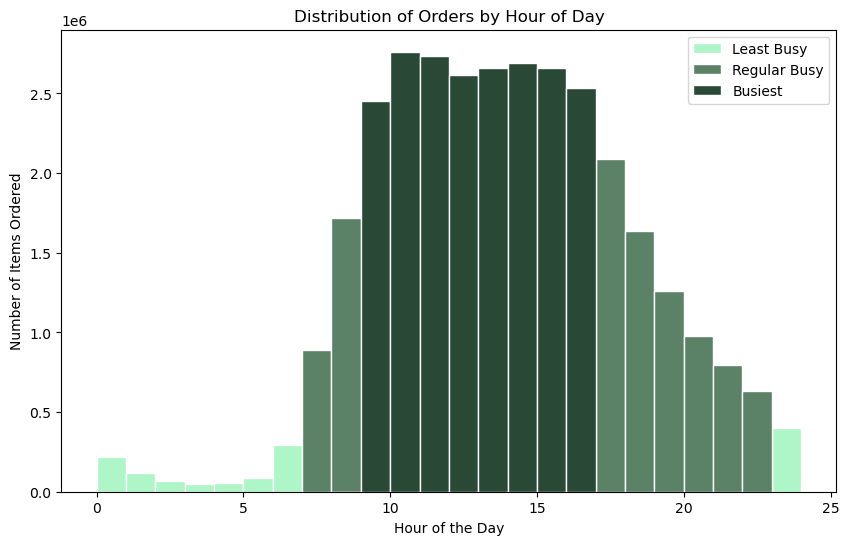

In [14]:
# Plotting the histogram for each subset
hod_hist = plt.figure()
least_busy['order_hour_of_day'].plot.hist(bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
                                                  10, 11, 12, 13, 14, 15, 16, 17, 
                                                  18, 19, 20, 21, 22, 23, 24], 
                                          color = '#aef6c7', edgecolor = 'white', figsize=(10, 6))
regular_busy['order_hour_of_day'].plot.hist(bins= [7, 8, 9, 10, 11, 12, 13, 14, 15, 
                                                   16, 17, 18, 19, 20, 21, 22, 23], 
                                            color = '#5b8266', edgecolor = 'white', figsize=(10, 6))
busiest['order_hour_of_day'].plot.hist(bins = [8, 9, 10, 11, 12, 13, 14, 15, 16, 17], 
                                       color = '#294936', edgecolor = 'white', figsize=(10, 6))


# Formatting the titles, axes, and legends
plt.title('Distribution of Orders by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Items Ordered')
plt.legend(legend_labels)

### CONCLUSIONS:
### This chart shows that most orders are placed between the late morning and early afternoon. Almost no orders are placed between midnight and 6am.

## 06. Bar Chart - Number of Orders x 'order_day_of_week'

### Reduce necessary data to run

In [15]:
# Subset the dataframe to only include the 'day', 'busiest_days', and 'order_id' columns
dow_bar_data = complete_instacart_data[['day', 'busiest_days', 'order_id']]

### Group data to find total orders by day of the week

In [16]:
# Aggregate the dataframe by counting the number of rows per day and busiest_days category
dow_bar_data = dow_bar_data.groupby(['day', 'busiest_days']).count()

In [17]:
# Sort the 'day' column using the order function
dow_bar_data = dow_bar_data.sort_values(by=['day'], key=lambda x: x.map(dow_order_func))

In [18]:
# Check the output
dow_bar_data

,,order_id
day,busiest_days,
Sunday,Busiest,5660230
Monday,Regularly busy,4213830
Tuesday,Least busy,3840534
Wednesday,Least busy,3783802
Thursday,Regularly busy,4205791
Friday,Regularly busy,4496490
Saturday,Busiest,6204182


### Plot the bar chart

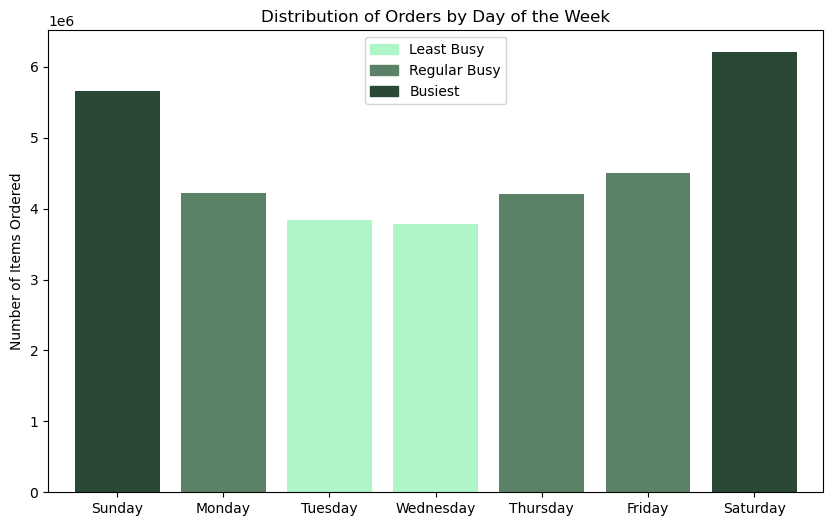

In [19]:
# Plotting the bar chart
dow_bar = dow_bar_data['order_id'].plot.bar(figsize=(10, 6), width = 0.8, 
                                            color= ['#294936', '#5b8266', '#aef6c7', '#aef6c7', 
                                                    '#5b8266', '#5b8266', '#294936'])
# FOR FUTURE: add data labels to bar chart

# Formatting the titles and axes
plt.title('Distribution of Orders by Day of the Week')
plt.xlabel('')
plt.ylabel('Number of Items Ordered')
dow_bar.set_xticklabels(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.xticks(rotation = 0)

# Formatting the legend
least_patch = mpatches.Patch(color = '#aef6c7', label='Least Busy')
regular_patch = mpatches.Patch(color = '#5b8266', label='Regular Busy')
busiest_patch = mpatches.Patch(color = '#294936', label='Busiest')
plt.legend(handles=[least_patch, regular_patch, busiest_patch])

### CONCLUSIONS:
### This chart shows that most orders are placed on the weekend (Saturday and Sunday).

## 07. Bar Chart - Total Items Ordered x 'loyalty_flag'

### Reduce necessary data to run

In [20]:
# Subset the dataframe to only include the 'loyalty_flag' and 'order_id' columns
loyalty_bar_data = complete_instacart_data[['loyalty_flag', 'order_id']]

### Group data to find total orders by customer loyalty

In [21]:
# Aggregate the dataframe by counting the number of rows per customer loyalty group
loyalty_bar_data = loyalty_bar_data.groupby('loyalty_flag').count()

In [22]:
# Sort the 'loyalty_flag' column using the order function
loyalty_bar_data = loyalty_bar_data.sort_values(by=['loyalty_flag'], key=lambda x: x.map(loyalty_order_func))

In [23]:
# Check the output
loyalty_bar_data

,order_id
loyalty_flag,
New Customer,6243990
Regular Customer,15876776
Loyal Customer,10284093


### Plot the bar chart

In [1]:
# Plotting the bar chart
loyalty_bar = plt.figure()
loyalty_bar_data['order_id'].plot.bar(color = colors, figsize=(10, 6), width = 0.8)

# Formatting the titles and axes
plt.title('Total Number of Items Ordered by Loyalty Group')
plt.xlabel('')
plt.ylabel('Total Number of Items Ordered')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 17000000, step=4000000))

NameError: name 'plt' is not defined

### CONCLUSIONS: 
### There are more orders made by our Regular Customer group than any other loyalty group. Loyal Customers make the second highest number of orders. And New Customers make the fewest numbers.

## 08. Bar Chart - Customers x 'loyalty_flag'

### Reduce necessary data to run

In [25]:
# Subset the dataframe to only include the 'loyalty_flag' and 'order_id' columns
unique_loyalty_bar_data = complete_instacart_data[['loyalty_flag', 'order_id']]

### Group data to find total customers for each customer loyalty group

In [26]:
# Aggregate the dataframe by counting the number of rows per customer loyalty group
unique_loyalty_bar_data = unique_loyalty_bar_data.groupby('loyalty_flag').nunique()

# Sort the 'loyalty_flag' column using the order function
unique_loyalty_bar_data = unique_loyalty_bar_data.sort_values(by=['loyalty_flag'], 
                                                              key=lambda x: x.map(loyalty_order_func))

In [27]:
# Check the output
unique_loyalty_bar_data

,order_id
loyalty_flag,
New Customer,637048
Regular Customer,1553120
Loyal Customer,1024517


### Plot the bar chart

([<matplotlib.axis.YTick at 0x3f46a8a90>,
 [Text(0, 0, '0.0'),
  Text(0, 400000, '0.4'),
  Text(0, 800000, '0.8'),
  Text(0, 1200000, '1.2'),
  Text(0, 1600000, '1.6')])

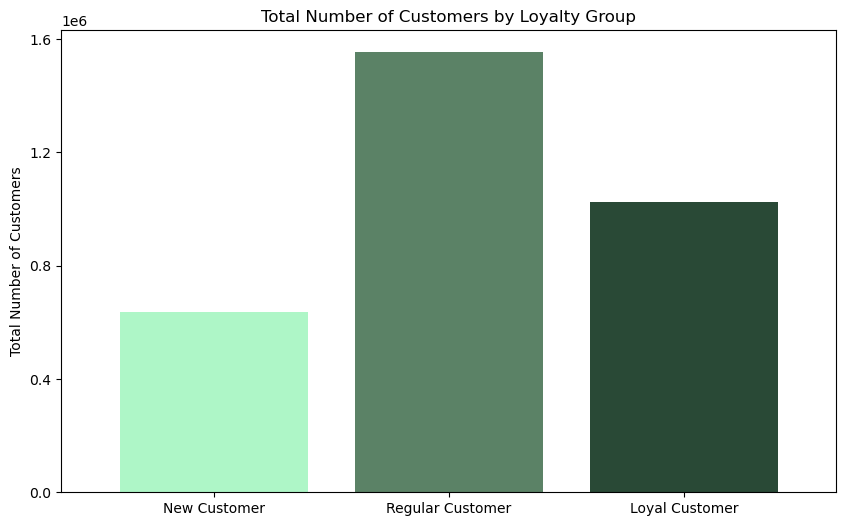

In [28]:
# Plotting the bar chart
unique_loyalty_bar = plt.figure()
unique_loyalty_bar_data['order_id'].plot.bar(color = colors, figsize=(10, 6), width = 0.8)
# FOR FUTURE: add data labels to bar chart

# Formatting the titles and axes
plt.title('Total Number of Customers by Loyalty Group')
plt.xlabel('')
plt.ylabel('Total Number of Customers')
plt.xticks(rotation = 0)
plt.yticks(np.arange(0, 1700000, step=400000))

### CONCLUSIONS:
### Like the total orders by customer loyalty bar chart showed, there are more Regular Customers than any other loyalty group. Loyal Customers are the second highest, and we have the fewest New Customers.

## 09. Stacked Bar Chart - 'family_status' x 'loyalty_flag'

### Group data with a crosstab comparing family status to customer loyalty

In [29]:
# Create a crosstab to use for stacked bar graph measuring the family status of each customer loyalty group
loyalty_family = pd.crosstab(complete_instacart_data['loyalty_flag'],
                             complete_instacart_data['family_status'], dropna = False, 
                             normalize='index') # Use normalize for stacked bar charts

# Sort the 'loyalty_flag' column using the order function
loyalty_family = loyalty_family.sort_values(by=['loyalty_flag'], key=lambda x: x.map(loyalty_order_func))

# Sort the 'family_status' column headings using the order function
loyalty_family = loyalty_family.sort_values(by=['family_status'], axis = 1, key=lambda x: x.map(family_order_func))

In [30]:
# Check the output
loyalty_family

family_status,living with parents and siblings,single,married,divorced/widowed
loyalty_flag,,,,
New Customer,0.046638,0.164761,0.703668,0.084933
Regular Customer,0.048287,0.163182,0.702949,0.085582
Loyal Customer,0.047914,0.165899,0.700353,0.085834


### Plot the stacked bar chart

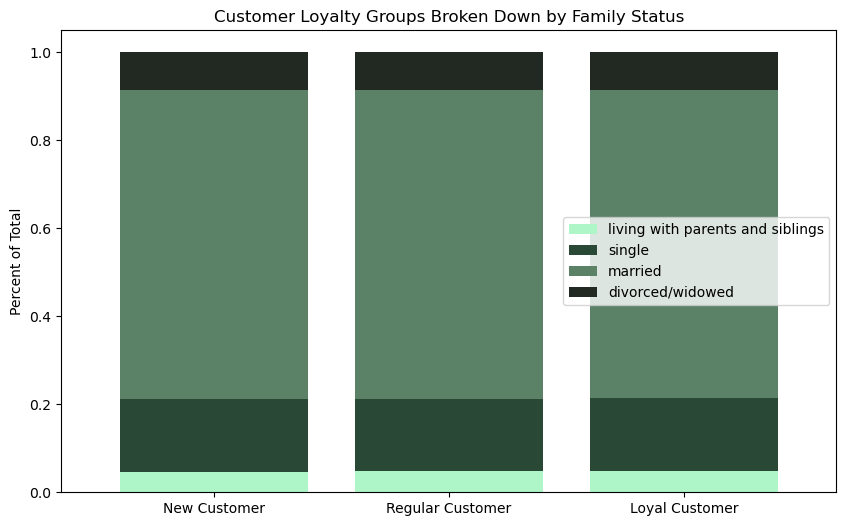

In [31]:
# Plotting the stacked bar chart
loyalty_family_stacked_bar = loyalty_family.plot(kind='bar', stacked=True, 
                                                 color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                 figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Customer Loyalty Groups Broken Down by Family Status')
plt.xlabel('')
plt.ylabel('Percent of Total')
plt.xticks(rotation = 0)
plt.legend(title = '', loc = 7)

### CONCLUSIONS:
### Within each loyalty group, the proportion of customers from the four different family statuses is the same.

## 10. Boxplot - 'age' x 'loyalty_flag'

### Reduce necessary data to run

In [32]:
# Select only the 'age' and 'loyalty_flag' columns to analyze
age_loyalty_box_data = small_30[['age', 'loyalty_flag']]


# Sort the 'loyalty_flag' column using the order function
age_loyalty_box_data = age_loyalty_box_data.sort_values(by=['loyalty_flag'], 
                                                        key=lambda x: x.map(loyalty_order_func))

In [33]:
# Check the output
age_loyalty_box_data

,age,loyalty_flag
0,31,New Customer
23097050,25,New Customer
23097048,25,New Customer
23097042,25,New Customer
23097041,25,New Customer
...,...,...
18110231,39,Loyal Customer
24523716,31,Loyal Customer
24523719,31,Loyal Customer
18110261,39,Loyal Customer


### Plot the boxplot

(array([0, 1, 2]),
 [Text(0, 0, 'New Customer'),
  Text(1, 0, 'Regular Customer'),
  Text(2, 0, 'Loyal Customer')])

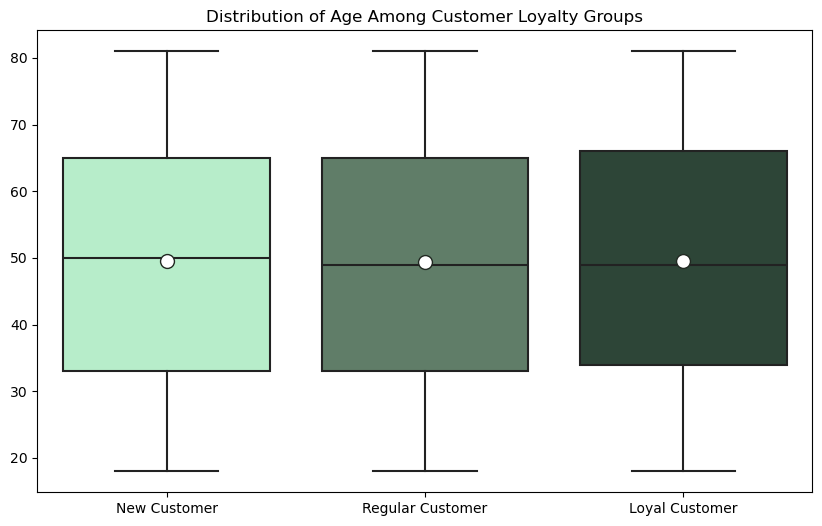

In [34]:
# Plotting the boxplot
age_loyalty_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'loyalty_flag', y = 'age', data = age_loyalty_box_data, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'})

# FOR FUTURE: add data points on top of boxes/whiskers


# Formatting the titles and axes
plt.title('Distribution of Age Among Customer Loyalty Groups')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### There are no differences in age between customers of different loyalty groups.

## 11. Line Chart - 'prices' x  'order_hour_of_day'

### Reduce necessary data to run

In [35]:
# Select only the 'order_hour_of_day' and 'prices' columns to analyze
hod_line_data = small_30[['order_hour_of_day', 'prices']]

### Plot the line chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

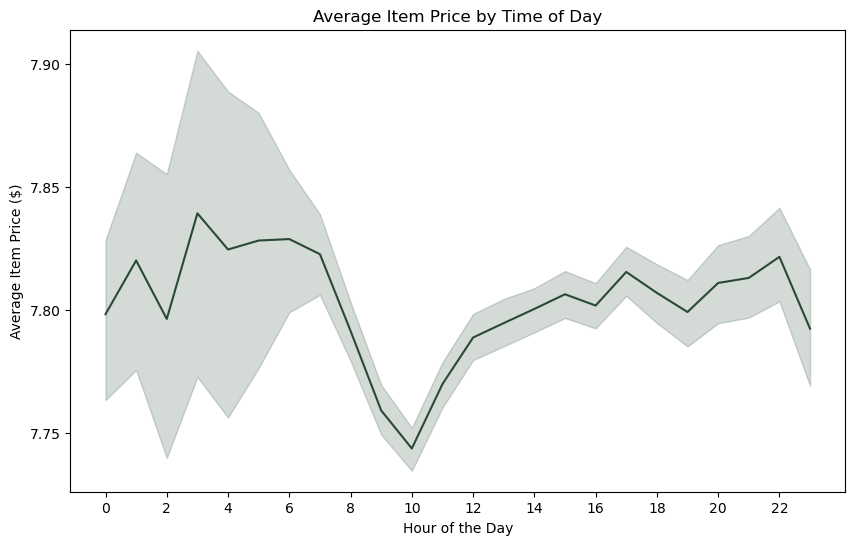

<Figure size 1000x600 with 0 Axes>

In [36]:
# Plotting the line chart
hod_line = plt.figure(figsize = (10,6))
sns.lineplot(x = 'order_hour_of_day', y = 'prices', data = hod_line_data,
                    color = '#294936')

# Formatting the titles and axes
plt.title('Average Item Price by Time of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Item Price ($)')
plt.xticks(np.arange(0, 23, step=2))
plt.yticks(np.arange(7.75, 7.90, step=0.05))
plt.figure(figsize = (10,6))

### CONCLUSIONS:
### The average item price hovers around $7.80 for most of the day. There is a change in the early morning, where item prices are on average higher. And another change in the late morning, where item prices are on average lower. Perhaps, users have more self-control when they wake up and can resist including expensive items in their order. And they have less self-control late at night.

## 12. Line Chart - 'prices' x 'order_day_of_week'

### Reduce necessary data to run

In [37]:
# Select only the 'day' and 'prices' columns to analyze
dow_line_data = small_30[['day', 'prices']]

In [38]:
# Sort the 'day' column using the order function
dow_line_data = dow_line_data.sort_values(by=['day'], key=lambda x: x.map(dow_order_func))

### Plot the line chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Average Item Price ($)')

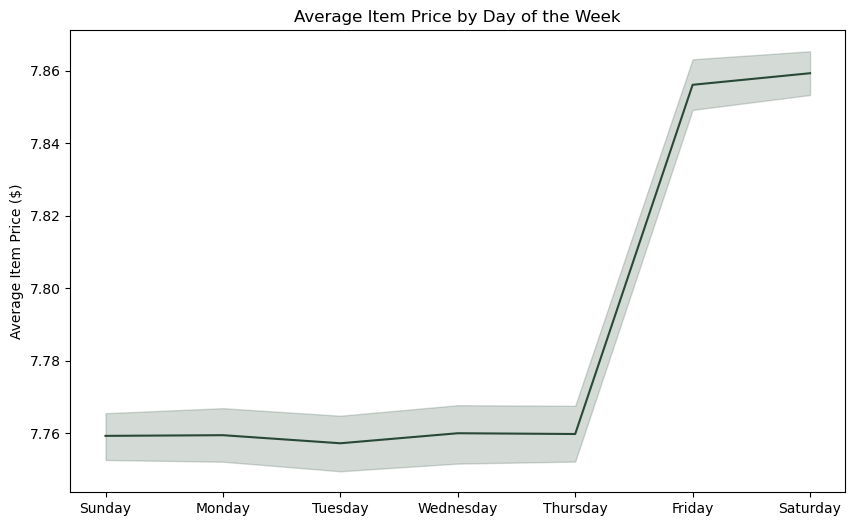

In [39]:
# Plotting the line chart
dow_line = plt.figure(figsize = (10,6))
sns.lineplot(x = 'day', y = 'prices', data = dow_line_data,
                    color = '#294936')

# Formatting the titles and axes
plt.title('Average Item Price by Day of the Week')
plt.xlabel('')
plt.ylabel('Average Item Price ($)')

### CONCLUSIONS:
### From Sunday to Thursday, the average item price is relatively consistent at $7.76. But for Friday and Saturday, the average item price jumps to 7.86.

## 13. Boxplot - 'prices' x 'loyalty_flag'

### Reduce necessary data to run

In [40]:
# Select only the 'prices' and 'loyalty_flag' columns to analyze
price_loyalty_box_data = small_30[['prices', 'loyalty_flag']]


# Sort the 'loyalty_flag' column using the order function
price_loyalty_box_data = price_loyalty_box_data.sort_values(by=['loyalty_flag'], 
                                                            key=lambda x: x.map(loyalty_order_func))

In [41]:
# Check the output
price_loyalty_box_data

,prices,loyalty_flag
0,9.0,New Customer
23097050,12.3,New Customer
23097048,3.5,New Customer
23097042,11.4,New Customer
23097041,2.4,New Customer
...,...,...
18110231,9.6,Loyal Customer
24523716,1.5,Loyal Customer
24523719,19.0,Loyal Customer
18110261,1.8,Loyal Customer


### Plot the boxplot

(array([0, 1, 2]),
 [Text(0, 0, 'New Customer'),
  Text(1, 0, 'Regular Customer'),
  Text(2, 0, 'Loyal Customer')])

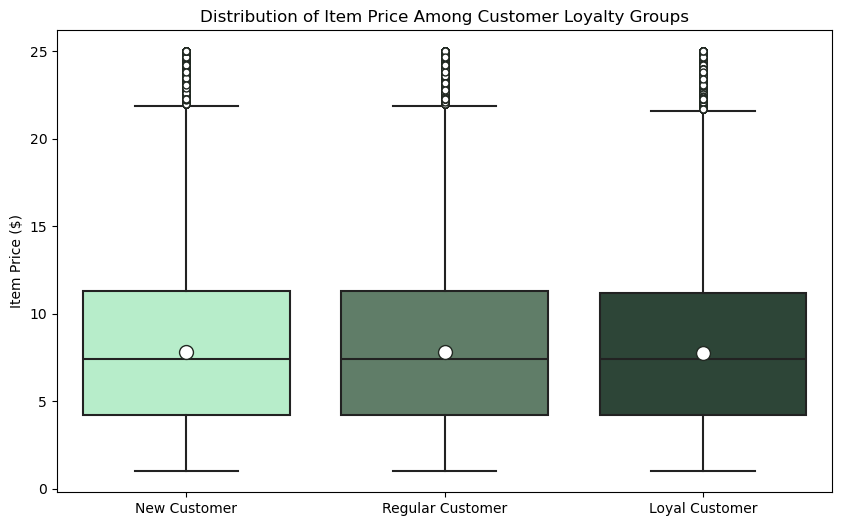

In [42]:
# Plotting the boxplot
price_loyalty_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'loyalty_flag', y = 'prices', data = price_loyalty_box_data, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers


# Formatting the titles and axes
plt.title('Distribution of Item Price Among Customer Loyalty Groups')
plt.xlabel('')
plt.ylabel('Item Price ($)')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### There are no differences in average item price between customer loyalty groups

## 14. Boxplot - Order Total x 'loyalty_flag'

### Reduce necessary data to run

In [43]:
# Select only the 'order_id', 'prices', and 'loyalty_flag' columns to analyze
order_total_loyalty_box_data = small_30[['order_id', 'prices', 'loyalty_flag']]

### Group data to find the order totals

In [44]:
# Aggregate the dataframe by totaling the values in the 'prices' column for each 'order_id'
order_total_loyalty_box_data = order_total_loyalty_box_data.groupby(['order_id', 'loyalty_flag']).sum()

# Sort the 'loyalty_flag' column using the order function
order_total_loyalty_box_data = order_total_loyalty_box_data.sort_values(by=['loyalty_flag'], 
                                                                        key=lambda x: x.map(loyalty_order_func))

In [45]:
# Check the output
order_total_loyalty_box_data.head(5)

,,prices
order_id,loyalty_flag,
2,New Customer,11.3
834272,New Customer,20.6
2433225,New Customer,4.5
834277,New Customer,67.9
834285,New Customer,22.9


### Plot the boxplot

(array([0, 1, 2]),
 [Text(0, 0, 'New Customer'),
  Text(1, 0, 'Regular Customer'),
  Text(2, 0, 'Loyal Customer')])

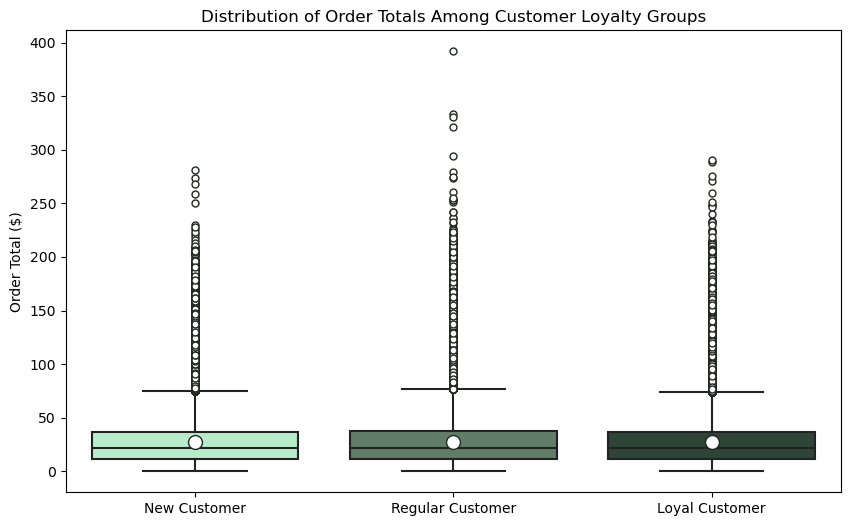

In [46]:
# Plotting the boxplot
order_total_loyalty_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'loyalty_flag', y = 'prices', data = order_total_loyalty_box_data.reset_index(), 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers


# Formatting the titles and axes
plt.title('Distribution of Order Totals Among Customer Loyalty Groups')
plt.xlabel('')
plt.ylabel('Order Total ($)')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### There are very few differences in order totals between customer loyalty groups. There are more extreme outliers in the Regular Customer group.

## 15. Stacked Bar - 'department' x 'loyalty_flag'

### Group data with a crosstab comparing department and customer loyalty

In [47]:
# Create a crosstab to use for clustered bar graph measuring the department totals of each customer loyalty group
loyalty_department = pd.crosstab(complete_instacart_data['department'],
                                 complete_instacart_data['loyalty_flag'], dropna = False, 
                                 normalize='index') # Use normalize for stacked bar charts

# Sort the 'loyalty_flag' column headings using the order function
loyalty_department = loyalty_department.sort_values(by=['loyalty_flag'], axis = 1, key=lambda x: x.map(loyalty_order_func))

In [48]:
# Check the output
loyalty_department

loyalty_flag,New Customer,Regular Customer,Loyal Customer
department,,,
alcohol,0.245276,0.502778,0.251945
babies,0.141854,0.463839,0.394307
bakery,0.190804,0.485191,0.324005
beverages,0.190791,0.491136,0.318072
breakfast,0.196807,0.488020,0.315173
bulk,0.152460,0.447401,0.400139
canned goods,0.221130,0.503048,0.275822
dairy eggs,0.179972,0.480930,0.339098
deli,0.195720,0.496032,0.308249


### Plot the stacked bar chart

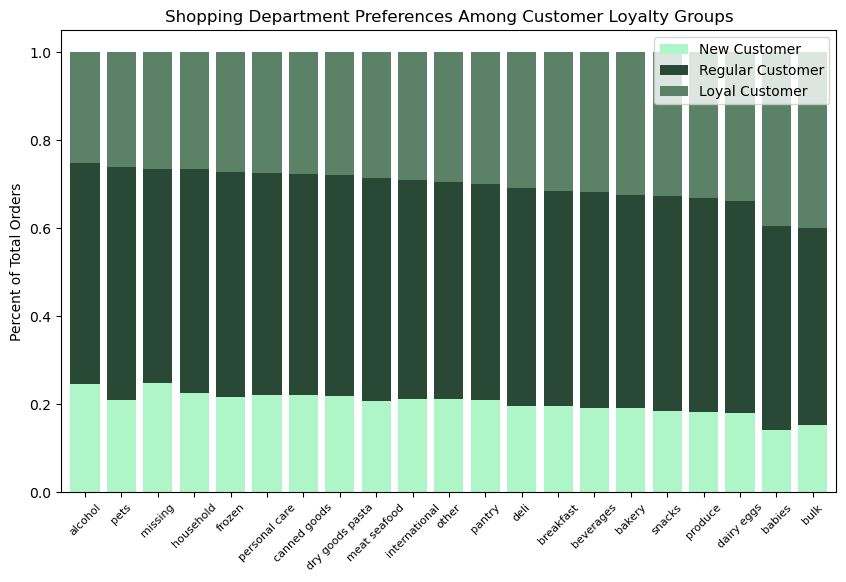

In [49]:
# Plotting a stacked bar chart
loyalty_department_stacked_bar = loyalty_department.sort_values('Loyal Customer').plot(kind='bar', stacked=True,
                                                         color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                         figsize=(10, 6), width = 0.8)

# Formatting the titles, axes, and legend
plt.title('Shopping Department Preferences Among Customer Loyalty Groups')
plt.xlabel('')
plt.ylabel('Percent of Total Orders')
plt.xticks(rotation = 45)
plt.xticks(fontsize=8)
plt.legend(loc = 1)

### CONCLUSIONS:
### New Customers buy a higher proportion of the orders from the Alcohol department, and are more likely to have missing department data from their orders. Regular Customers buy a higher proportion of orders from the Pet department. And Loyal Customers buy a higher proportion of orders from the Baby and Bulk departments.

## 16. Histogram - Number of Items x 'prices'

### Create three dataframes to plot together

In [50]:
# Subsetting the data based on previously made 'price_label' variable
low_range = complete_instacart_data[complete_instacart_data['price_label'] == 'Low-Range Product']
mid_range = complete_instacart_data[complete_instacart_data['price_label'] == 'Mid-Range Product']
high_range = complete_instacart_data[complete_instacart_data['price_label'] == 'High-Range Product']

# Labels for legend
price_legend_labels = ['Low-Range Product', 'Mid-Range Product', 'High-Range Product']

### Plot the histogram

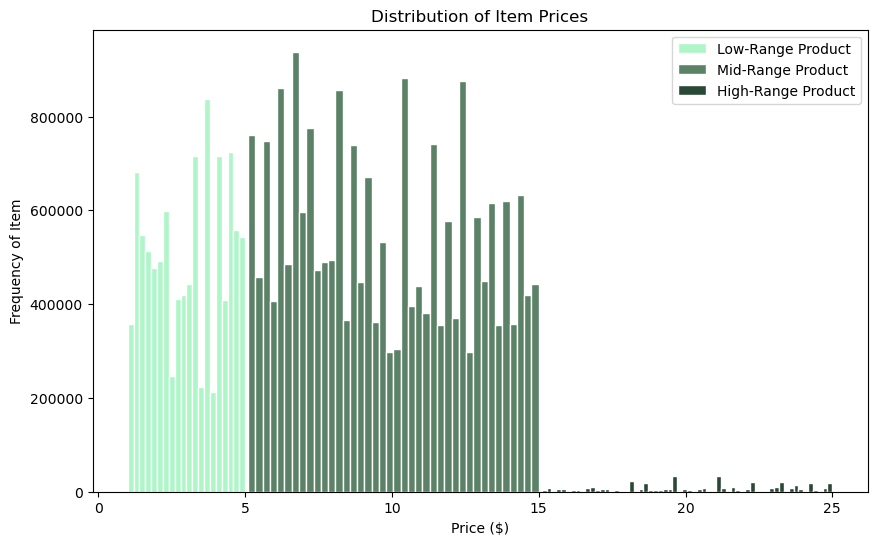

In [51]:
# Plotting the histogram
price_hist = plt.figure()
low_range['prices'].plot.hist(bins = 20, color = '#aef6c7', edgecolor = 'white', figsize=(10, 6))
mid_range['prices'].plot.hist(bins= 40, color = '#5b8266', edgecolor = 'white', figsize=(10, 6))
high_range['prices'].plot.hist(bins = 60, color = '#294936', edgecolor = 'white', figsize=(10, 6))

# Formatting the titles, axes, and legend
plt.title('Distribution of Item Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency of Item')
plt.legend(price_legend_labels)

### CONCLUSIONS:
### There are a good number of products within the Low-Range and Mid-Range product groups, but the number of products available about $15 is very limited.

## 17. Bar Chart - Number of Orders by 'department'

### Reduce necessary data to run

In [52]:
# Subset the dataframe to only include the 'order_id' and 'department' columns
dep_bar = complete_instacart_data[['order_id', 'department']]

### Group data to find the total orders in each department

In [53]:
# Aggregate the dataframe by counting the number of rows per department
dep_bar_data = dep_bar.groupby('department').count()

In [54]:
# Check the output
dep_bar_data

,order_id
department,
alcohol,153696
babies,423802
bakery,1172428
beverages,2688123
breakfast,703033
bulk,34573
canned goods,1068058
dairy eggs,5398747
deli,1051249


### Plot the bar chart

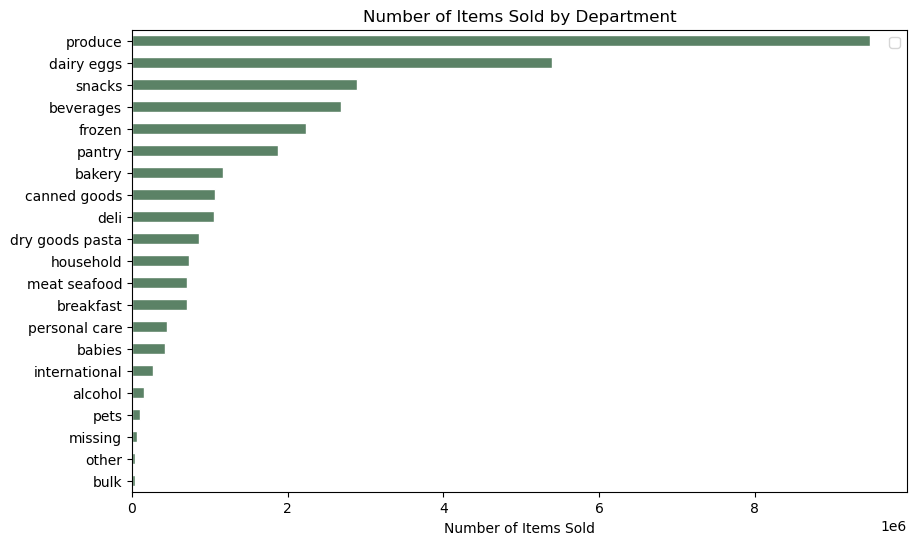

In [55]:
# Plotting the (horizontal) bar chart
dep_barplot = dep_bar_data.sort_values(by=['order_id']).plot.barh(color = '#5b8266', 
                                                                  edgecolor = 'white', figsize=(10, 6))
# FOR FUTURE: look at creating a gradient on the color


# Formatting the titles and axes
plt.title('Number of Items Sold by Department')
plt.xlabel('Number of Items Sold')
plt.ylabel('')
plt.legend('')

### CONCLUSIONS:
### The top 5 departments in terms of items sold are: (1) Produce, (2) Dairy Eggs, (3) Snacks, (4) Beverages, and (5) Frozen. The bottom 5 departments are: (1) Bulk, (2) Other, (3) Missing, (4) Pets, and (5) Alcohol.

## 18. Line Chart - 'age' x 'number_of_dependents'

### Reduce necessary data to run

In [56]:
# Select only the 'age' and 'number_of_dependents' columns to analyze
age_dependents_data = small_30[['age', 'number_of_dependents']]

### Plot the Line Chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_12071/3540568148.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age_dependents_data['age'], b(age_dependents_data['number_of_dependents']),"r--", color = '#aef6c7')


Text(0, 0.5, 'Number of Dependents')

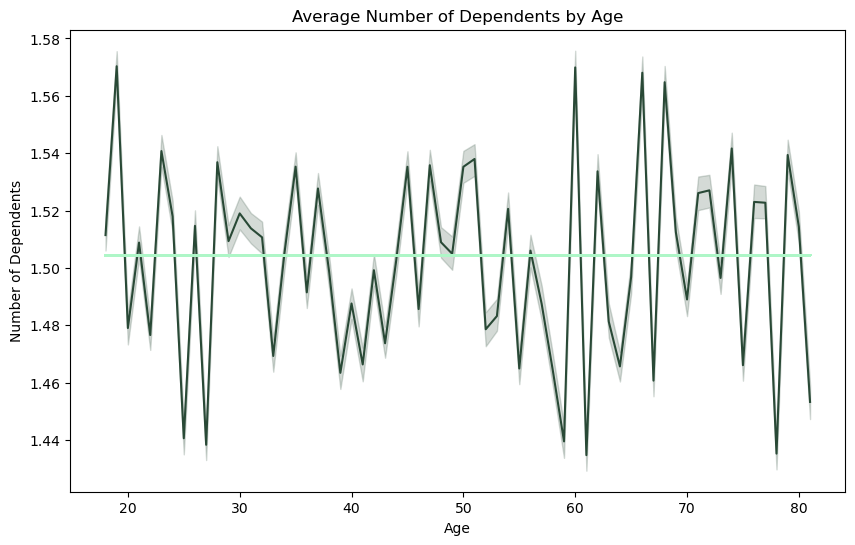

In [57]:
# Plotting the line chart
age_dependents_line = plt.figure(figsize = (10,6))
sns.lineplot(x = 'age', y = 'number_of_dependents', data = age_dependents_data, color = '#294936')

# Formatting the regression line
a = np.polyfit(age_dependents_data['age'], age_dependents_data['number_of_dependents'], 1)
b = np.poly1d(a)
plt.plot(age_dependents_data['age'], b(age_dependents_data['number_of_dependents']),"r--", color = '#aef6c7')

# Formatting the titles and axes
plt.title('Average Number of Dependents by Age')
plt.xlabel('Age')
plt.ylabel('Number of Dependents')

### CONCLUSIONS:
### There is no correlation between age and number of dependents. Users are just as likely to have the average number of dependents (~1.5) at any of the observed ages (between 18 and 81).

## 19. Scatterplot - 'age' x 'income'

### Reduce necessary data to run

In [58]:
# Select only the 'age' and 'income' columns to analyze
age_income_scatter_data = small_30[['age', 'income']]

### Plot the Scatterplot

Text(0, 0.5, 'Income ($)')

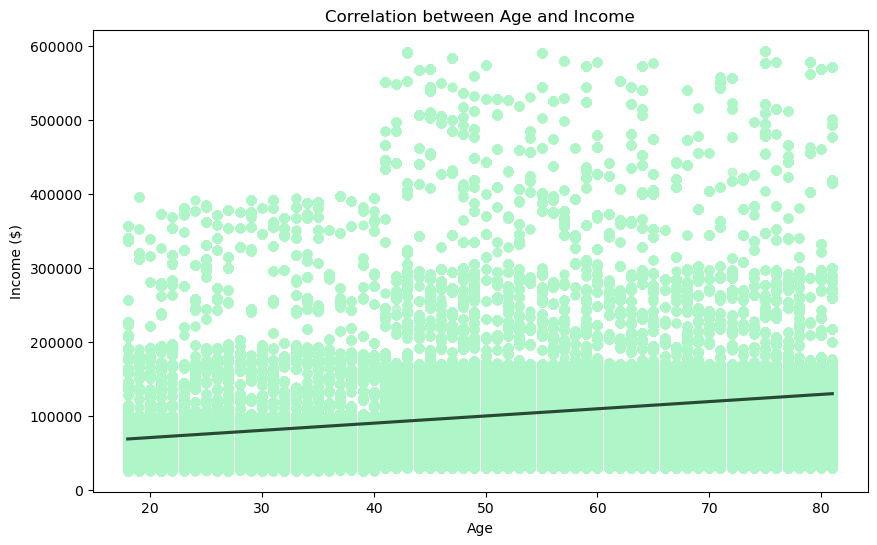

In [59]:
# Plotting the scatterplot
# Using sns.regplot() instead of sns.scatterplot() to include a regression line
age_income_scatter = plt.figure(figsize = (10,6))
sns.regplot(data = age_income_scatter_data, x = 'age', y = 'income', 
            scatter_kws = {'color': '#aef6c7', 'alpha': 0.5},
            line_kws = {'color': '#294936'})

# Formatting the titles and axes
plt.title('Correlation between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income ($)')

### CONCLUSIONS:
### There is a modest, positive correlation between age and income. Older users are more likely to have a higher income. However, this is due to the more extreme incomes being more likely in older users. The majority of all users have an income less than $200,000.

## 20. Boxplot - 'age' x 'family_status'

### Reduce necessary data to run

In [60]:
# Select only the 'age' and 'family_status' columns to analyze
age_family = small_30[['age', 'family_status']]

# Sort the 'family_status' column using the order function
age_family = age_family.sort_values(by=['family_status'], key=lambda x: x.map(family_order_func))

### Plot the boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'living with parents and siblings'),
  Text(1, 0, 'single'),
  Text(2, 0, 'married'),
  Text(3, 0, 'divorced/widowed')])

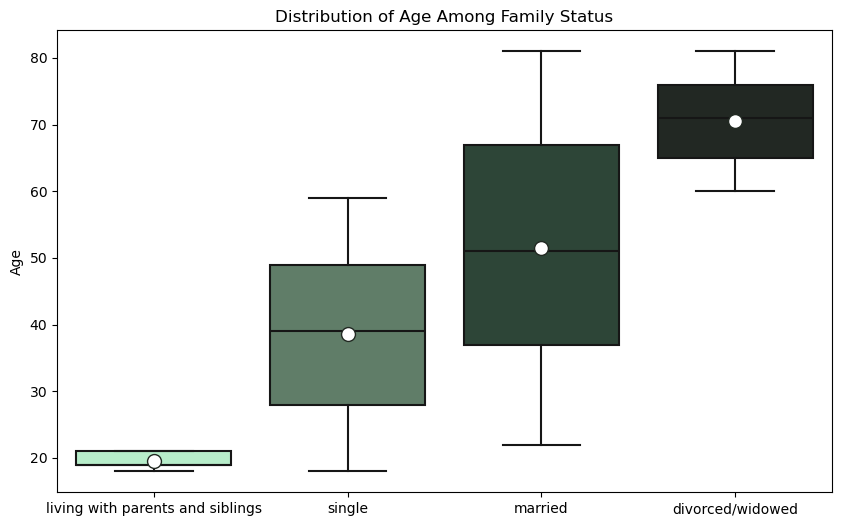

In [61]:
# Plotting the boxplot
age_family_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'family_status', y = 'age', data = age_family, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers, and 


# Formatting the titles and axes
plt.title('Distribution of Age Among Family Status')
plt.xlabel('')
plt.ylabel('Age')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### Family status is correlated to age. Customers who live with their parents/siblings are the youngest, and divorced/widowed customers are the oldest.

## 21. Line Chart - 'age' x 'prices'

### Reduce necessary data to run

In [62]:
# Select only the 'age' and 'prices' columns to analyze
age_price_data = small_30[['age', 'prices']]

### Plot the Line Chart

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/40/hn3x1h6s6vgb3bv80rtm46q80000gn/T/ipykernel_12071/2818973369.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(age_price_data['age'], d(age_price_data['prices']),"r--", color = '#aef6c7')


Text(0, 0.5, 'Price of Item ($)')

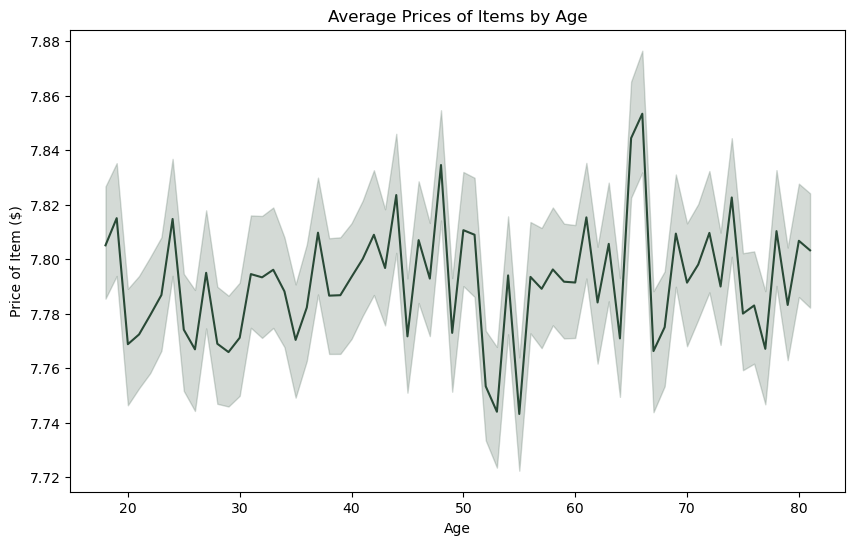

In [63]:
# Plotting the line chart
age_price_line = plt.figure(figsize = (10,6))
sns.lineplot(x = 'age', y = 'prices', data = age_price_data, color = '#294936')

# Formatting the regression line
c = np.polyfit(age_price_data['age'], age_price_data['prices'], 1)
d = np.poly1d(c)
plt.plot(age_price_data['age'], d(age_price_data['prices']),"r--", color = '#aef6c7')
# FOR FUTURE: not sure why this regression line isn't showing up

# Formatting the titles and axes
plt.title('Average Prices of Items by Age')
plt.xlabel('Age')
plt.ylabel('Price of Item ($)')

### CONCLUSIONS:
### While the average item price is relatively consistent across all ages, customers in their early 50s are most likely to buy cheaper products. And customers in their mid 60s are most likely to buy expensive products.

## 22. Boxplot - 'prices' and 'family_status'

### Reduce necessary data to run

In [64]:
# Select only the 'family_status' and 'prices' columns to analyze
family_price = small_30[['family_status', 'prices']]

# Sort the 'family' column using the order function
family_price = family_price.sort_values(by=['family_status'], key=lambda x: x.map(family_order_func))

### Plot the Boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'living with parents and siblings'),
  Text(1, 0, 'single'),
  Text(2, 0, 'married'),
  Text(3, 0, 'divorced/widowed')])

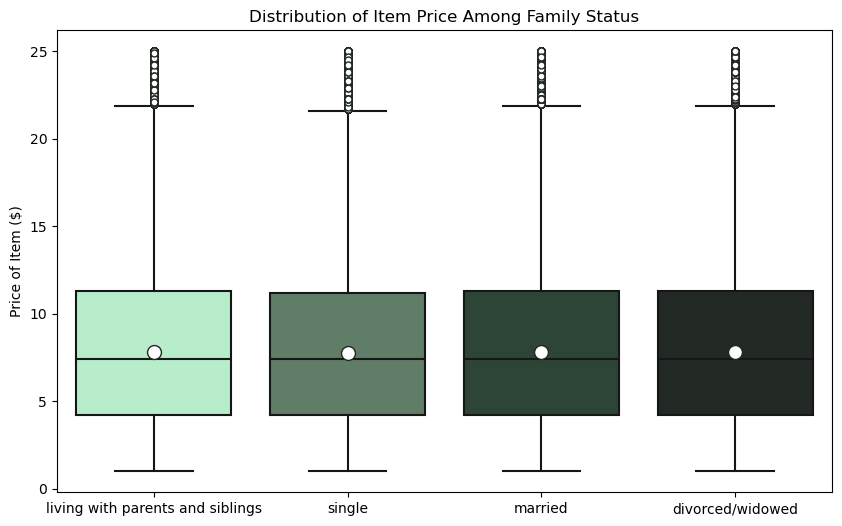

In [65]:
# Plotting the boxplot
family_price_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'family_status', y = 'prices', data = family_price, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers, and 


# Formatting the titles and axes
plt.title('Distribution of Item Price Among Family Status')
plt.xlabel('')
plt.ylabel('Price of Item ($)')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### There are no differences between prices of items ordered between customers of a different family status.

## 23. Bar Chart - 'age' and 'department'

### Reduce necessary data to run

In [66]:
# Select only the 'age' and 'department' columns to analyze
age_department = complete_instacart_data[['age', 'department']]

### Group data to find average age of customers

In [67]:
# Aggregate the dataframe by averaging the age per product department
age_department = age_department.groupby('department').mean()

In [68]:
# Check the output
age_department

,age
department,
alcohol,48.915769
babies,49.302769
bakery,49.456298
beverages,49.606900
breakfast,49.364761
bulk,49.355942
canned goods,49.412606
dairy eggs,49.404384
deli,49.474371


### Plot the Bar Chart

([<matplotlib.axis.YTick at 0x563db21d0>,
 [Text(0, 0, '0'),
  Text(0, 10, '10'),
  Text(0, 20, '20'),
  Text(0, 30, '30'),
  Text(0, 40, '40'),
  Text(0, 50, '50'),
  Text(0, 60, '60')])

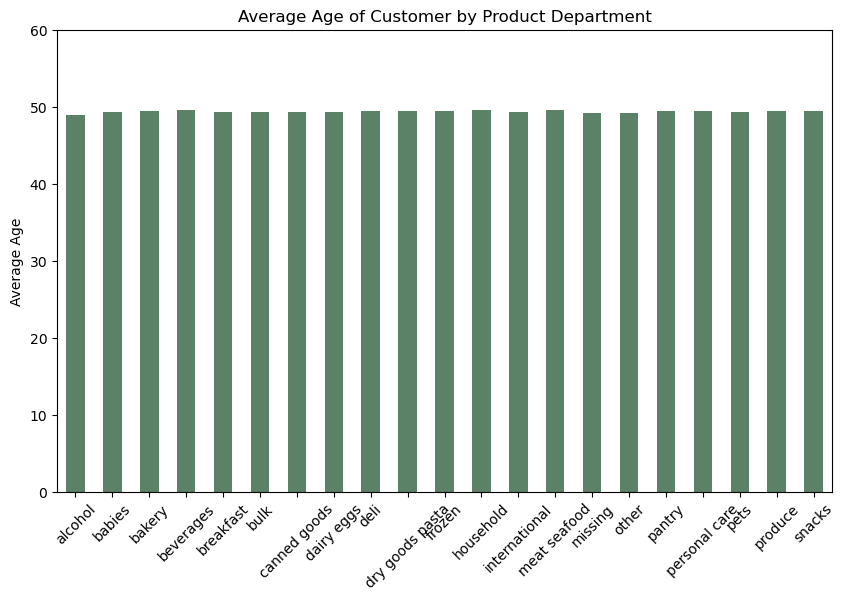

In [69]:
# Plotting the bar chart
age_department_bar = age_department['age'].plot.bar(color = '#5b8266', figsize=(10, 6))

# Formatting the titles and axes
plt.title('Average Age of Customer by Product Department')
plt.xlabel('')
plt.ylabel('Average Age')
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, 65, step = 10))

### CONCLUSIONS:
### There are no differences in the average age of a customer who shops in any of the 21 product departments.

## 24. Stacked Bar Chart - 'department' x 'family_status'

### Group data with a crosstab comparing product department to family status

In [70]:
# Create a crosstab for clustered bar graph measuring total products in each department sold per family status
department_family = pd.crosstab(complete_instacart_data['department'],
                                complete_instacart_data['family_status'], dropna = False,
                                normalize='index') # Use normalize for stacked bar charts)

# Sort the 'family_status' column headings using the order function
department_family = department_family.sort_values(by=['family_status'], axis = 1, 
                                                  key=lambda x: x.map(family_order_func))

In [71]:
# Create long table to be compatible with a clustered bar graph
department_family_long = department_family.reset_index().melt(id_vars='department', 
                                                              var_name='family_status', value_name= 'count')

In [72]:
# Check the output
department_family

family_status,living with parents and siblings,single,married,divorced/widowed
department,,,,
alcohol,0.057880,0.172438,0.687604,0.082078
babies,0.047536,0.167927,0.701181,0.083355
bakery,0.047885,0.165472,0.701008,0.085635
beverages,0.046363,0.164954,0.702740,0.085943
breakfast,0.049402,0.163689,0.702279,0.084630
bulk,0.048419,0.159460,0.712145,0.079976
canned goods,0.047928,0.164391,0.704110,0.083571
dairy eggs,0.048305,0.164381,0.701755,0.085559
deli,0.047957,0.165828,0.699824,0.086391


### Plot the Stacked Bar Chart

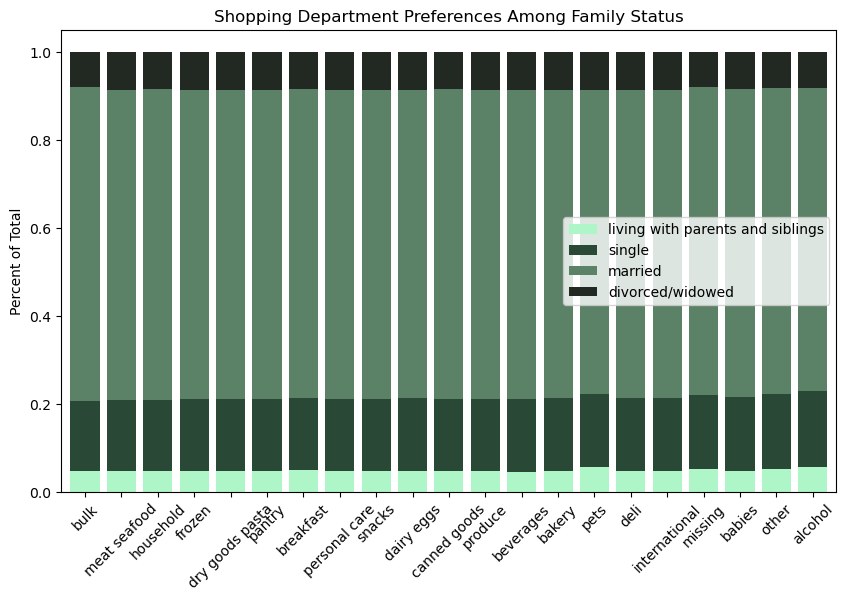

In [73]:
# Plotting the stacked bar chart
department_family_stacked_bar = department_family.sort_values('single').plot(kind='bar', stacked=True,
                                                         color = ['#aef6c7', '#294936', '#5b8266', '#212922'],
                                                         figsize=(10, 6), width = 0.8)

# Formatting the titles and axes
plt.title('Shopping Department Preferences Among Family Status')
plt.xlabel('')
plt.ylabel('Percent of Total')
plt.xticks(rotation = 45)
#plt.yticks(np.arange(0, 3500000, step = 1000000))
plt.legend(loc = 5)

### CONCLUSIONS:
### There are roughly no difference in the proportion of products in each product category ordered by customers from a different family status.

## 25. Line Chart - Total Items Ordered x 'age'

### Reduce necessary data to run // Group data to find total items ordered

In [74]:
# Select only the 'age' and 'order_id' columns to analyze
age_orders_data = small_30[['user_id', 'age', 'order_id']]

# Group the data by 'user_id' and 'age'
age_orders_data = age_orders_data.groupby(['user_id','age'])['order_id'].count()

In [75]:
# Check the output
age_orders_data

user_id  age
1        31      17
10       34      40
100      64      11
1000     25      24
10000    33     325
               ... 
99995    43      18
99996    41      39
99997    27      12
99998    38       6
99999    40     100
Name: order_id, Length: 205483, dtype: int64

### Plot the Scatterplot

Text(0, 0.5, 'Total Items Orders')

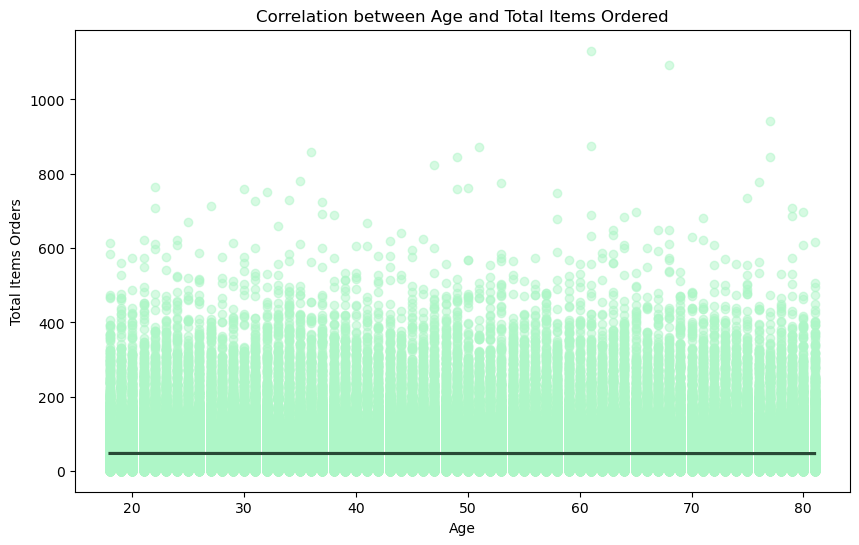

In [76]:
# Plotting the scatterplot
# Using sns.regplot() instead of sns.scatterplot() to include a regression line
age_orders_scatter = plt.figure(figsize = (10,6))
sns.regplot(data = age_orders_data.reset_index(), #Use reset_index() after performing groupby function 
            x = 'age', y = 'order_id', 
            scatter_kws = {'color': '#aef6c7', 'alpha': 0.5},
            line_kws = {'color': '#294936'})

# Formatting the titles and axes
plt.title('Correlation between Age and Total Items Ordered')
plt.xlabel('Age')
plt.ylabel('Total Items Orders')

### CONCLUSIONS:
### There is no correlation between age of the customer and total items ordered. Older customers are more likely to have purchased the higher outlier numbers, but this isn't enough to result in a positive correlation.

## 26. Boxplot - Total Items Ordered x 'family_status'

### Reduce necessary data to run // Group data to find total items ordered

In [77]:
# Select only the 'age' and 'order_id' columns to analyze
family_orders_data = small_30[['user_id', 'family_status', 'order_id']]

# Group the data by 'user_id' and 'family_status'
family_orders_data = family_orders_data.groupby(['user_id','family_status'])['order_id'].count().reset_index()

# Sort the 'family_status' column using the order function
family_orders_data = family_orders_data.sort_values(by=['family_status'], 
                                                  key=lambda x: x.map(family_order_func))

In [78]:
# Check the output
family_orders_data

,user_id,family_status,order_id
98505,188952,living with parents and siblings,49
123603,26039,living with parents and siblings,37
167088,65324,living with parents and siblings,19
94944,185739,living with parents and siblings,55
199568,9466,living with parents and siblings,17
...,...,...,...
187411,83679,divorced/widowed,49
93179,184142,divorced/widowed,188
125130,2742,divorced/widowed,2
165226,63643,divorced/widowed,15


### Plot the boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'living with parents and siblings'),
  Text(1, 0, 'single'),
  Text(2, 0, 'married'),
  Text(3, 0, 'divorced/widowed')])

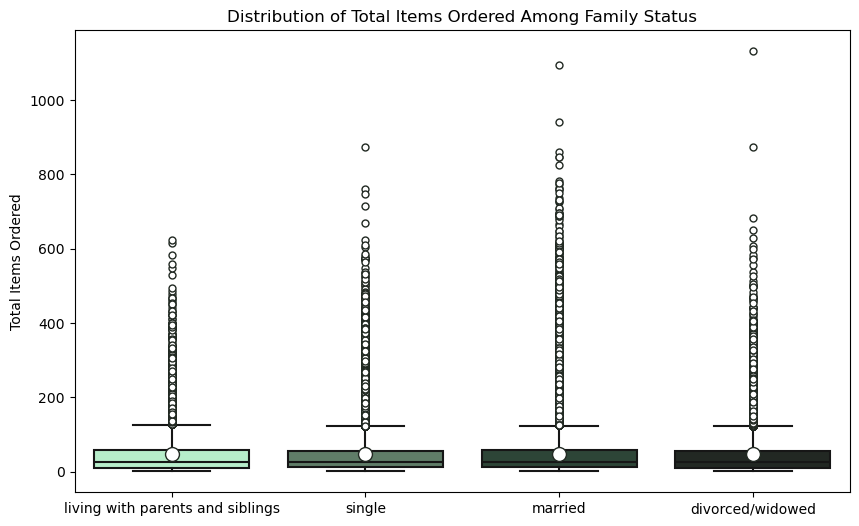

In [79]:
# Plotting the boxplot
family_orders_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'family_status', y = 'order_id', data = family_orders_data, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers, and 


# Formatting the titles and axes
plt.title('Distribution of Total Items Ordered Among Family Status')
plt.xlabel('')
plt.ylabel('Total Items Ordered')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### There are very few differences in the total items ordered between customers of a different family status. Married and divorced/widowed customers are more likely to have the extreme outliers, but the mean total items is consistent across family status.

## 27. Boxplot - 'number_of_dependents' x 'family_status'

### Reduce necessary data to run

In [80]:
# Select only the 'family_status' and 'number_of_dependents' columns to analyze
family_dependents_data = small_30[['family_status', 'number_of_dependents']]

# Sort the 'family_status' column using the order function
family_dependents_data = family_dependents_data.sort_values(by=['family_status'], 
                                                  key=lambda x: x.map(family_order_func))

In [81]:
# Check the output
family_dependents_data

,family_status,number_of_dependents
18490178,living with parents and siblings,2
14399327,living with parents and siblings,1
14399330,living with parents and siblings,1
14399331,living with parents and siblings,1
14399332,living with parents and siblings,1
...,...,...
4810238,divorced/widowed,0
4810239,divorced/widowed,0
4810241,divorced/widowed,0
4810215,divorced/widowed,0


### Plot the Boxplot

(array([0, 1, 2, 3]),
 [Text(0, 0, 'living with parents and siblings'),
  Text(1, 0, 'single'),
  Text(2, 0, 'married'),
  Text(3, 0, 'divorced/widowed')])

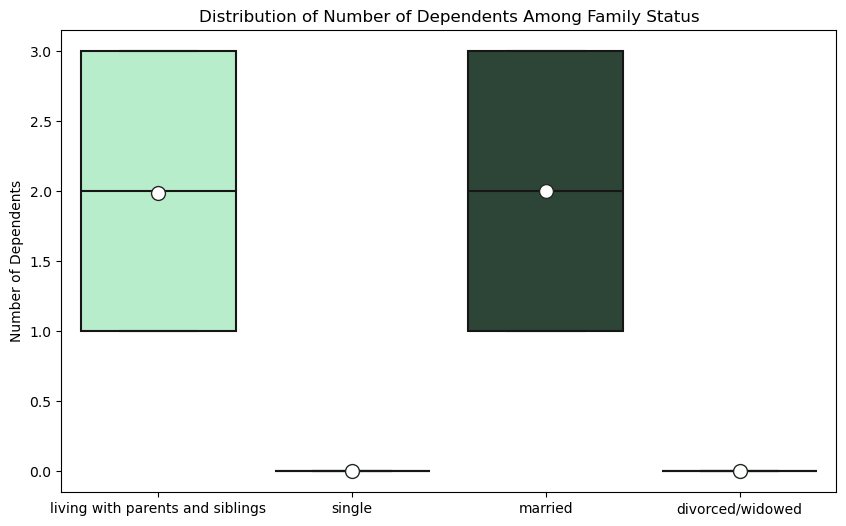

In [82]:
# Plotting the boxplot
family_dependents_boxplot = plt.figure(figsize = (10,6))
sns.boxplot(x = 'family_status', y = 'number_of_dependents', data = family_dependents_data, 
            palette = colors, showmeans=True, showfliers = True,
            meanprops={'marker' : 'o',
                       'markerfacecolor' : 'white',
                       'markeredgecolor' : '#212922',
                       'markersize' : '10'},
            flierprops={'marker': 'o', 'markersize': 5, 'markeredgecolor': '#212922', 'markerfacecolor' : 'white'})

# FOR FUTURE: add data points on top of boxes/whiskers


# Formatting the titles and axes
plt.title('Distribution of Number of Dependents Among Family Status')
plt.xlabel('')
plt.ylabel('Number of Dependents')
plt.xticks(rotation = 0)

### CONCLUSIONS:
### There are no single or divorced/widowed customers with dependents. And married customers and customers living with parents/siblings have an average of two dependents. This is a very harsh difference, which makes me think there could be error in data reporting or manual manipulation of the data.

## 28. Exporting Visualizations

In [83]:
# Exporting (05) histogram to the Visualizations folder
hod_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_frequency_hod.png'))

In [84]:
# Exporting (06) bar chart to the Visualizations folder
dow_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_bar.png'))

In [85]:
# Exporting (07) bar chart to the Visualizations folder
loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_loyalty.png'))

In [86]:
# Exporting (08) bar chart to the Visualizations folder
unique_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customers_loyalty.png'))

In [87]:
# Exporting (09) stacked bar chart to the Visualizations folder
loyalty_family_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_loyalty_family.png'))

In [88]:
# Exporting (10) boxplot to the Visualizations folder
age_loyalty_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_age_loyalty.png'))

In [89]:
# Exporting (11) line chart to the Visualizations folder
hod_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hod.png'))

In [90]:
# Exporting (12) line chart to the Visualizations folder
dow_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dow_line.png'))

In [91]:
# Exporting (13) boxplot to the Visualizations folder
price_loyalty_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_loyalty_boxplot.png'))

In [92]:
# Exporting (14) boxplot to the Visualizations folder
order_total_loyalty_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_total_loyalty_boxplot.png'))

In [93]:
# Exporting (15) stacked bar chart to the Visualizations folder
loyalty_department_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_depart_stacked.png'))

In [94]:
# Exporting (16) histogram to the Visualizations folder
price_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_histogram.png'))

In [95]:
# Exporting (17) bar chart to the Visualizations folder
dep_barplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_depart_orders.png'))

In [96]:
# Exporting (18) line chart to the Visualizations folder
age_dependents_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_depend_age.png'))

In [97]:
# Exporting (19) scatterplot to the Visualizations folder
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_income_age.png'))

In [98]:
# Exporting (20) boxplot to the Visualizations folder
age_family_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_age_family.png'))

In [99]:
# Exporting (21) line chart to the Visualizations folder
age_price_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_price.png'))

In [100]:
# Exporting (22) boxplot to the Visualizations folder
family_price_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_family_price.png'))

In [101]:
# Exporting (23) bar chart to the Visualizations folder
age_department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_depart.png'))

In [102]:
# Exporting (24) stacked bar chart to the Visualizations folder
department_family_stacked_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_depart_family.png'))

In [103]:
# Exporting (25) scatterplot to the Visualizations folder
age_orders_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_orders.png'))

In [104]:
# Exporting (26) boxplot to the Visualizations folder
family_orders_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_family_orders.png'))

In [105]:
# Exporting (27) boxplot to the Visualizations folder
family_dependents_boxplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'boxplot_family_depend.png'))